# Solow Growth Model: Review

## Setting up the Python/Jupyter environment

In [1]:
%%javascript

IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;}

<IPython.core.display.Javascript object>

In [2]:
# keep output cells from shifting to autoscroll: little scrolling
# subwindows within the notebook are an annoyance...

In [3]:
# set up the environment by reading in every library we might need: 
# os... graphics... data manipulation... time... math... statistics...

import sys
import os
from urllib.request import urlretrieve

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image

import pandas as pd
from pandas import DataFrame, Series
from datetime import datetime

import scipy as sp
import numpy as np
import math
import random

import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# report library versions...

/Users/delong/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
%matplotlib inline 

# put graphs into the notebook itself...

In [5]:
# graphics setup: seaborn-whitegrid and figure size...

plt.style.use('seaborn-whitegrid')

figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 12
figure_size[1] = 10
plt.rcParams["figure.figsize"] = figure_size

## Key Equations

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \left(\frac{Y}{L}\right) = \left(\frac{K}{Y}\right)^{\frac{α}{1-α}} \left(E\right) $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \left(\frac{Y}{L}\right)^* = \left(\frac{s}{n+g+δ}\right)^{\frac{α}{1-α}} \left(E\right) $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{d(K/Y)}{dt} = - (1-α)(n + g + δ)\left(\frac{K}{Y} - \frac{s}{n + g + δ}\right)  $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{K_t}{Y_t} = \frac{s}{\delta + n + g} + \left(\frac{K_0}{Y_0} - \frac{s}{\delta + n + g}\right) e^{-(1 - \alpha)(\delta + g + n)t}  $

----

&nbsp;

## Foundations

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \left(\frac{Y}{L}\right) = \left(\frac{K}{L}\right)^{α}\left(E\right)^{1-α} $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$\frac{1}{L}\frac{dL}{dt} = n  $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$\frac{1}{E}\frac{dE}{dt} = g  $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$\frac{1}{K}\frac{dK}{dt} = s\left(\frac{Y}{K}\right) - \delta  $

----

&nbsp;

## Increase in Savings Rate s

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$\left({\frac{K}{Y}^*}\right)_{old} = \frac{s}{n+g+\delta}  $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \left({\frac{K}{Y}^*}\right)_{new} = \frac{s+{\Delta}s}{n+g+\delta}  $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \left({\frac{K}{Y}^*}\right)_{new} = \left(\frac{s}{n+g+\delta}\right) + \left(\frac{{\Delta}s}{(n+g+\delta)}\right)  $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \left(\frac{K}{Y}^*\right)_{new} - \left(\frac{K}{Y}^*\right)_{old} = \left(\frac{{\Delta}s}{n+g+\delta}\right)  $

----

### Convergence

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{K_t}{Y_t} = \left({\frac{K}{Y}^*}\right)_{new} + \left(\left({\frac{K}{Y}^*}\right)_{old} - \left({\frac{K}{Y}^*}\right)_{new}\right) e^{-(1-\alpha)(n+g+\delta)t}  $

----

### Output per Worker

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{Y_t}{L_t} = \left(\frac{K_t}{Y_t}\right)^\left(\frac{\alpha}{1-\alpha}\right)E_t =  $


----

&nbsp;

## Increase in Labor Force Growth

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\frac{K}{Y}^*}_{old} = \frac{s}{n+g+\delta}  $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\frac{K}{Y}^*}_{new} = \frac{s}{n+{\Delta}n+g+\delta}  $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\frac{K}{Y}^*}_{new} = \left(\frac{s}{n+g+\delta}\right)\left(\frac{n+g+\delta}{(n+g+\delta) + {\Delta}n}\right)  $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\frac{K}{Y}^*}_{new} = \left(\frac{s}{n+g+\delta}\right) \left(\frac{1}{1 + \frac{{\Delta}n}{n+g+\delta}}\right)  $

$  $

Because $ \frac{1}{1+x}  $ is approximately $ 1-x  $ for small x...

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\frac{K}{Y}^*}_{new} - {\frac{K}{Y}^*}_{old} = - \left({\frac{K}{Y}^*}_{old}\right)\left(\frac{{\Delta}n}{n+g+\delta}\right)  $

----

### Convergence

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{K_t}{Y_t} = \left({\frac{K}{Y}^*}\right)_{new} + \left(\left({\frac{K}{Y}^*}\right)_{old} - \left({\frac{K}{Y}^*}\right)_{new}\right) e^{-(1-\alpha)(n+{\Delta}n+g+\delta)t}  $

----

### Output per Worker

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{Y_t}{L_t} = \left(\frac{K_t}{Y_t}\right)^\left(\frac{\alpha}{1-\alpha}\right)E_t   $




----

&nbsp;

## Increase in Labor Efficiency Growth

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\frac{K}{Y}^*}_{old} = \frac{s}{n+g+\delta}  $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\frac{K}{Y}^*}_{new} = \frac{s}{n+g+{\Delta}g+\delta}  $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\frac{K}{Y}^*}_{new} = \left(\frac{s}{n+g+\delta}\right)\left(\frac{n+g+\delta}{(n+g+\delta) + {\Delta}g}\right)  $

Because $ \frac{1}{1+x}  $ is approximately $ 1-x  $ for small x...

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\frac{K}{Y}^*}_{new} = {\frac{K}{Y}^*}_{old} - \left({\frac{K}{Y}^*}_{old}\right)\left(\frac{{\Delta}g}{n+g+\delta}\right)  $

----

### Convergence

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{K_t}{Y_t} = \left({\frac{K}{Y}^*}\right)_{new} + \left(\left({\frac{K}{Y}^*}\right)_{old} - \left({\frac{K}{Y}^*}\right)_{new}\right) e^{-(1-\alpha)(n+g+{\Delta}g+\delta)t}  $

----

### Output per Worker

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{Y_t}{L_t} = \left(\frac{K_t}{Y_t}\right)^\left(\frac{\alpha}{1-\alpha}\right)E_t = \left(\frac{K_t}{Y_t}\right)^\left(\frac{\alpha}{1-\alpha}\right){E_0}e^{gt}e^{{\Delta}gt}  $

----

&nbsp;

In [6]:
# FUNCTION FOR CALCULATING AND GRAPHING THE LEVELS OF 
# SOLOW GROWTH MODEL VARIABLES IN SIMULATIONS
#
# might as well put "check that common libraries are active" as a default header
# in every long python code cell...

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import numpy as np
%matplotlib inline

# we are going to want to see what happens for lots of
# different model parameter values and base conditions,
# so stuff our small simulation program inside a function, so 
# we can then invoke it with a single line...
#
# we are going to assume the economy starts on its base
# balanced growth path...
#
# we are going to want to keep track not just of what the
# economy's variables are at each point in time, but also 
# what the base and alternative balanced-growth path 
# values of variables are. Given the parameters, the new BGP 
# is attracting the economy to it at the speed (1-α)(n+g+δ), 
# closing that fraction of the gap between its current state 
# and the balanced growth path attractor every period...

def sgm_3_bgp_100yr_run(L0, E0, n=0.01, g=0.015, s=0.20, 
    alpha=0.5, delta=0.025, Delta_s=0, Delta_g=0, Delta_n=0, 
    T = 100, graphs="LEVELS"):

    sg_df = pd.DataFrame(index=range(T),columns=['Labor', 
        'Efficiency',
        'Capital',
        'Output',
        'Output_per_Worker',
        'Capital_Output_Ratio',
        'BGP_base_Labor',
        'BGP_base_Efficiency',
        'BGP_base_Output',
        'BGP_base_Output_per_Worker',
        'BGP_base_Capital_Output_Ratio',
        'BGP_base_Capital',
        'BGP_alt_Labor',
        'BGP_alt_Efficiency',
        'BGP_alt_Output',
        'BGP_alt_Output_per_Worker',
        'BGP_alt_Capital_Output_Ratio',
        'BGP_alt_Capital'],
        dtype='float')

    sg_df.Labor[0] = L0
    sg_df.BGP_base_Labor[0] = L0
    sg_df.BGP_alt_Labor[0] = L0
    sg_df.Efficiency[0] = E0
    sg_df.BGP_base_Efficiency[0] = E0
    sg_df.BGP_alt_Efficiency[0] = E0

    KoverY_base_steady_state = s/(n+g+delta)
    YoverL_base_steady_state = ((s/(n+g+delta))**(alpha/(1-alpha)) 
        * E0)
    KoverL_base_steady_state = (YoverL_base_steady_state *
        KoverY_base_steady_state)
    
    sg_df.Capital[0] = KoverL_base_steady_state * L0
    sg_df.Output[0] = (sg_df.Capital[0]**alpha * (sg_df.Labor[0] * 
        sg_df.Efficiency[0])**(1-alpha))
    sg_df.Output_per_Worker[0] = sg_df.Output[0]/sg_df.Labor[0]
    sg_df.Capital_Output_Ratio[0] = sg_df.Capital[0]/sg_df.Output[0]
    
    sg_df.BGP_base_Capital_Output_Ratio[0] = (s / (n + g + delta))
    sg_df.BGP_base_Output_per_Worker[0] = sg_df.Efficiency[0] * (
        sg_df.BGP_base_Capital_Output_Ratio[0]*(alpha/(1 - alpha)))
    sg_df.BGP_base_Output[0] = sg_df.BGP_base_Output_per_Worker[0] * sg_df.Labor[0]
    sg_df.BGP_base_Capital[0] = sg_df.BGP_base_Output[0] * (
        sg_df.BGP_base_Capital_Output_Ratio[0])
    
    sg_df.BGP_alt_Capital_Output_Ratio[0] = ((s + Delta_s) / 
        (n + Delta_n + g + Delta_g + delta))
    sg_df.BGP_alt_Output_per_Worker[0] = sg_df.Efficiency[0] * (
        sg_df.BGP_alt_Capital_Output_Ratio[0]*(alpha/(1 - alpha)))
    sg_df.BGP_alt_Output[0] = sg_df.BGP_alt_Output_per_Worker[0] * sg_df.Labor[0]
    sg_df.BGP_alt_Capital[0] = sg_df.BGP_alt_Output[0] * (
        sg_df.BGP_alt_Capital_Output_Ratio[0])
    
    for i in range(T):
        sg_df.Labor[i+1] = (sg_df.Labor[i] * np.exp(n + Delta_n))
        sg_df.Efficiency[i+1] = (sg_df.Efficiency[i] * np.exp(g + Delta_g))
        KoverY_current = sg_df.Capital[i]/sg_df.Output[i]
        sg_df.Capital[i+1] = (sg_df.Capital[i] * np.exp((s+Delta_s)/ 
            KoverY_current - delta))
        sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha * 
            (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
        sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
        sg_df.Capital_Output_Ratio[i+1] = (sg_df.Capital[i+1]/
            sg_df.Output[i+1])

    for i in range(T):
        sg_df.BGP_base_Labor[i+1] = (sg_df.BGP_base_Labor[i] * np.exp(n))
        sg_df.BGP_base_Efficiency[i+1] = (sg_df.BGP_base_Efficiency[i] * np.exp(g))
        sg_df.BGP_base_Capital_Output_Ratio[i+1] = (s / (n + g + delta))
        sg_df.BGP_base_Output_per_Worker[i+1] = sg_df.BGP_base_Efficiency[i+1] * (
            sg_df.BGP_base_Capital_Output_Ratio[i+1]**(alpha/(1 - alpha)))
        sg_df.BGP_base_Output[i+1] = (sg_df.BGP_base_Output_per_Worker[i+1] * 
            sg_df.BGP_base_Labor[i+1])
        sg_df.BGP_base_Capital[i+1] = (s / (n + g + delta))**(1/(1-alpha)) * (
            sg_df.Efficiency[i+1] * sg_df.Labor[i+1])

    for i in range(T):
        sg_df.BGP_alt_Labor[i+1] = (sg_df.BGP_alt_Labor[i] * np.exp(n + Delta_n))
        sg_df.BGP_alt_Efficiency[i+1] = (sg_df.BGP_alt_Efficiency[i] * np.exp(g+Delta_g))
        sg_df.BGP_alt_Capital_Output_Ratio[i+1] = ((s+ Delta_s) / 
            (n + Delta_n + g + Delta_g + delta))
        sg_df.BGP_alt_Output_per_Worker[i+1] = sg_df.BGP_alt_Efficiency[i+1] * (
            sg_df.BGP_alt_Capital_Output_Ratio[i+1]**(alpha/(1 - alpha)))
        sg_df.BGP_alt_Output[i+1] = (sg_df.BGP_alt_Output_per_Worker[i+1] * 
            sg_df.BGP_alt_Labor[i+1])
        sg_df.BGP_alt_Capital[i+1] = ((s + Delta_s) / (n + Delta_n + g + Delta_g + delta))**(1/(1-alpha)) * (
            sg_df.BGP_alt_Efficiency[i+1] * sg_df.BGP_alt_Labor[i+1])  
    
    if (graphs == "LEVELS"):
        fig = plt.figure(figsize=(12, 12))

        ax1 = plt.subplot(2,3,1)
        sg_df.BGP_base_Labor.plot(ax = ax1, title = "BGP (base) Labor")
        sg_df.BGP_alt_Labor.plot(ax = ax1, title = "BGP (alt) Labor")
        sg_df.Labor.plot(ax = ax1, title = "Labor Force")
        plt.ylabel("Values")
        plt.ylim(0, )

        ax2 = plt.subplot(2,3,2)
        sg_df.BGP_base_Efficiency.plot(ax = ax2, title = "BGP (base) Efficiency")
        sg_df.BGP_alt_Efficiency.plot(ax = ax2, title = "BGP (alt) Efficiency")
        sg_df.Efficiency.plot(ax = ax2, title = "Efficiency of Labor")
        plt.ylim(0, )
    
        ax3 = plt.subplot(2,3,3)
        sg_df.BGP_base_Capital.plot(ax = ax3, title = "BGP (base) Capital Stock")
        sg_df.BGP_alt_Capital.plot(ax = ax3, title = "BGP (alt) Capital Stock")
        sg_df.Capital.plot(ax = ax3, title = "Capital Stock")
        plt.ylim(0, )

        ax4 = plt.subplot(2,3,4)
        sg_df.BGP_base_Output.plot(ax = ax4, title = "BGP (base) Output")
        sg_df.BGP_alt_Output.plot(ax = ax4, title = "BGP (alt) Output")
        sg_df.Output.plot(ax = ax4, title = "Output")
        plt.ylabel("Values")
        plt.xlabel("Years")
        plt.ylim(0, )

        ax5 = plt.subplot(2,3,5)
        sg_df.BGP_base_Output_per_Worker.plot(ax = ax5, title = "BGP (base) Output per Worker")
        sg_df.BGP_alt_Output_per_Worker.plot(ax = ax5, title = "BGP (alt) Output per Worker")
        sg_df.Output_per_Worker.plot(ax = ax5, title = "Output per Worker")
        plt.xlabel("Years")
        plt.ylim(0, )

        ax6 = plt.subplot(2,3,6)
        sg_df.BGP_base_Capital_Output_Ratio.plot(ax = ax6, 
            title = "BGP (base) Capital-Output Ratio")
        sg_df.BGP_alt_Capital_Output_Ratio.plot(ax = ax6, 
            title = "BGP (alt) Capital-Output Ratio")
        sg_df.Capital_Output_Ratio.plot(ax = ax6, 
            title = "Capital-Output Ratio")
        plt.xlabel("Years")
        plt.ylim(0, )

        plt.suptitle('Solow Growth Model: Levels: Simulation Run', size = 20)

        plt.show()
        
    if (graphs == "LOGS"):
        fig = plt.figure(figsize=(12, 12))

        ax1 = plt.subplot(2,3,1)
        np.log(sg_df.BGP_base_Labor).plot(ax = ax1, title = "BGP (base) Labor")
        np.log(sg_df.BGP_alt_Labor).plot(ax = ax1, title = "BGP (alt) Labor")
        np.log(sg_df.Labor).plot(ax = ax1, title = "Log Labor Force")
        plt.ylabel("Values")
        plt.ylim(0, )

        ax2 = plt.subplot(2,3,2)
        np.log(sg_df.BGP_base_Efficiency).plot(ax = ax2, title = "BGP (base) Efficiency")
        np.log(sg_df.BGP_alt_Efficiency).plot(ax = ax2, title = "BGP (alt) Efficiency")
        np.log(sg_df.Efficiency).plot(ax = ax2, title = "Log Efficiency of Labor")
        plt.ylim(0, )
    
        ax3 = plt.subplot(2,3,3)
        np.log(sg_df.BGP_base_Capital).plot(ax = ax3, title = "BGP (base) Capital Stock")
        np.log(sg_df.BGP_alt_Capital).plot(ax = ax3, title = "BGP (alt) Capital Stock")
        np.log(sg_df.Capital).plot(ax = ax3, title = "Log Capital Stock")
        plt.ylim(0, )

        ax4 = plt.subplot(2,3,4)
        np.log(sg_df.BGP_base_Output).plot(ax = ax4, title = "BGP (base) Output")
        np.log(sg_df.BGP_alt_Output).plot(ax = ax4, title = "BGP (alt) Output")
        np.log(sg_df.Output).plot(ax = ax4, title = "Log Output")
        plt.ylabel("Values")
        plt.xlabel("Years")
        plt.ylim(0, )

        ax5 = plt.subplot(2,3,5)
        np.log(sg_df.BGP_base_Output_per_Worker).plot(ax = ax5, title = "BGP (base) Output per Worker")
        np.log(sg_df.BGP_alt_Output_per_Worker).plot(ax = ax5, title = "BGP (alt) Output per Worker")
        np.log(sg_df.Output_per_Worker).plot(ax = ax5, title = "Log Output per Worker")
        plt.xlabel("Years")
        plt.ylim(0, )

        ax6 = plt.subplot(2,3,6)
        sg_df.BGP_base_Capital_Output_Ratio.plot(ax = ax6, 
            title = "BGP (base) Capital-Output Ratio")
        sg_df.BGP_alt_Capital_Output_Ratio.plot(ax = ax6, 
            title = "BGP (alt) Capital-Output Ratio")
        sg_df.Capital_Output_Ratio.plot(ax = ax6, 
            title = "Capital-Output Ratio")
        plt.xlabel("Years")
        plt.ylim(0, )

        plt.suptitle('Solow Growth Model: Logs: Simulation Run', size = 20)

        plt.show()
    
    if ((graphs != "LEVELS") and (graphs != "LOGS")):
        fig = "NONE"
        
    print("The blue line is the initial balanced-growth path;")
    print("the orange line is the alternative balanced growth path;")
    print("the green line is the track of the economy as it transitions")
    print("from the baseline to the alternative BGP.")
    print(" ")
    
    print(n + Delta_n, "is the baseline labor-force growth rate")
    print(g + Delta_g, "is the baseline efficiency-of-labor growth rate")
    print(s + Delta_s, "is the baseline savings rate")
    print(" ")
          
    print(n + Delta_n, "is the alternative labor-force growth rate")
    print(g + Delta_g, "is the alternative efficiency-of-labor growth rate")
    print(s + Delta_s, "is the alternative savings-investment rate")
    print(" ")
    
    print(delta, "is the depreciation rate")
    print(alpha, "is the orientation-of-growth-toward-capital parameter")
    
    SGM_dict = {}
    SGM_dict["df"] = sg_df
    SGM_dict["plots"] = fig
    
    return SGM_dict

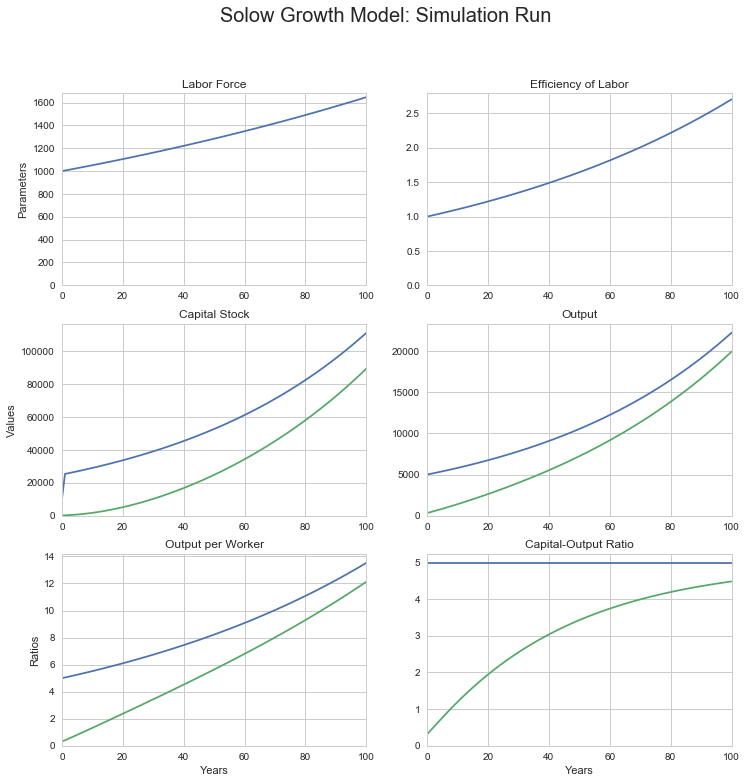

0.005 is the labor force growth rate
0.01 is the efficiency of labor growth rate
0.03 is the depreciation rate
0.225 is the savings rate
0.5 is the decreasing-returns-to-scale parameter


In [7]:
sgm_bgp_100yr_run(1000, 1, 100, n=0.005, g=0.01, 
    s=0.225, alpha=0.5, delta=0.03)

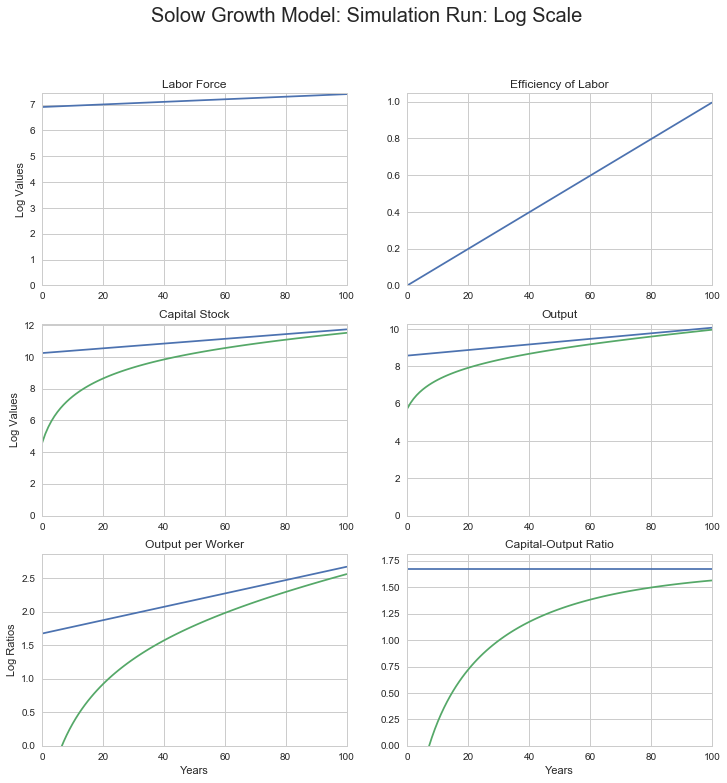

0.005 is the labor force growth rate
0.01 is the efficiency of labor growth rate
0.03 is the depreciation rate
0.24 is the savings rate
0.5 is the decreasing-returns-to-scale parameter


In [8]:
# convergence to the balanced growth path—log graphs
#
# we need to alter our dataframe in order to add a BGP line
#
# # we are going to want to see what happens for lots of
# different model parameter values and initial conditions,
# so stuff our small simulation program inside a function, so 
# we can then invoke it with a single line...

def log_sgm_bgp_100yr_run(L0, E0, K0, n=0.01, g=0.02, 
    s=0.15, alpha=0.5, delta=0.03, T=100):

    sg_df = pd.DataFrame(index=range(T),columns=['Labor', 
        'Efficiency',
        'Capital',
        'Output',
        'Output_per_Worker',
        'Capital_Output_Ratio',
        'BGP_Output',
        'BGP_Output_per_Worker',
        'BGP_Capital_Output_Ratio',
        'BGP_Capital'],
        dtype='float')

    sg_df.Labor[0] = L0
    sg_df.Efficiency[0] = E0
    sg_df.Capital[0] = K0
    sg_df.Output[0] = (sg_df.Capital[0]**alpha * (sg_df.Labor[0] * sg_df.Efficiency[0])**(1-alpha))
    sg_df.Output_per_Worker[0] = sg_df.Output[0]/sg_df.Labor[0]
    sg_df.Capital_Output_Ratio[0] = sg_df.Capital[0]/sg_df.Output[0]
    sg_df.BGP_Capital_Output_Ratio[0] = (s / (n + g + delta))
    sg_df.BGP_Output_per_Worker[0] = sg_df.Efficiency[0] * sg_df.BGP_Capital_Output_Ratio[0]*(alpha/(1 - alpha))
    sg_df.BGP_Output[0] = sg_df.BGP_Output_per_Worker[0] * sg_df.Labor[0]
    sg_df.BGP_Capital[0] = (s / (n + g + delta))**(1/(1-alpha)) * sg_df.Efficiency[0] * sg_df.Labor[0]

    for i in range(T):
        sg_df.Labor[i+1] = sg_df.Labor[i] + sg_df.Labor[i] * n
        sg_df.Efficiency[i+1] = sg_df.Efficiency[i] + sg_df.Efficiency[i] * g
        sg_df.Capital[i+1] = sg_df.Capital[i] - sg_df.Capital[i] * delta + sg_df.Output[i] * s 
        sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha * (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
        sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
        sg_df.Capital_Output_Ratio[i+1] = sg_df.Capital[i+1]/sg_df.Output[i+1]
        sg_df.BGP_Capital_Output_Ratio[i+1] = (s / (n + g + delta))
        sg_df.BGP_Output_per_Worker[i+1] = sg_df.Efficiency[i+1] * sg_df.BGP_Capital_Output_Ratio[i+1]**(alpha/(1 - alpha))
        sg_df.BGP_Output[i+1] = sg_df.BGP_Output_per_Worker[i+1] * sg_df.Labor[i+1]
        sg_df.BGP_Capital[i+1] = (s / (n + g + delta))**(1/(1-alpha)) * sg_df.Efficiency[i+1] * sg_df.Labor[i+1]

        
    fig = plt.figure(figsize=(12, 12))

    ax1 = plt.subplot(3,2,1)
    np.log(sg_df.Labor).plot(ax = ax1, title = "Labor Force")
    plt.ylabel("Log Values")
    plt.ylim(0, )

    ax2 = plt.subplot(3,2,2)
    np.log(sg_df.Efficiency).plot(ax = ax2, title = "Efficiency of Labor")
    plt.ylim(0, )
    
    ax3 = plt.subplot(3,2,3)
    np.log(sg_df.BGP_Capital).plot(ax = ax3, title = "BGP Capital Stock")
    np.log(sg_df.Capital).plot(ax = ax3, title = "Capital Stock")
    plt.ylabel("Log Values")
    plt.ylim(0, )

    ax4 = plt.subplot(3,2,4)
    np.log(sg_df.BGP_Output).plot(ax = ax4, title = "BGP Output")
    np.log(sg_df.Output).plot(ax = ax4, title = "Output")
    plt.ylim(0, )

    ax5 = plt.subplot(3,2,5)
    np.log(sg_df.BGP_Output_per_Worker).plot(ax = ax5, title = "BGP Output per Worker")
    np.log(sg_df.Output_per_Worker).plot(ax = ax5, title = "Output per Worker")
    plt.xlabel("Years")
    plt.ylabel("Log Ratios")
    plt.ylim(0, )

    ax6 = plt.subplot(3,2,6)
    np.log(sg_df.BGP_Capital_Output_Ratio).plot(ax = ax6, title = "BGP Capital-Output Ratio")
    np.log(sg_df.Capital_Output_Ratio).plot(ax = ax6, title = "Capital-Output Ratio")
    plt.xlabel("Years")
    plt.ylim(0, )

    plt.suptitle('Solow Growth Model: Simulation Run: Log Scale', size = 20)

    plt.show()
    
    print(n, "is the labor force growth rate")
    print(g, "is the efficiency of labor growth rate")
    print(delta, "is the depreciation rate")
    print(s, "is the savings rate")
    print(alpha, "is the decreasing-returns-to-scale parameter")
    
log_sgm_bgp_100yr_run(1000, 1, 100, n=0.005, g=0.01, s=0.24, 
    alpha=0.5, delta=0.03)

In [ ]:
# suppose we started the economy on some balanced growth path, say
# for s = 0.20. And then s jumped to 0.25. What would happen?
#
# n=0.01, g=0.01, delta=0.03, s=0.20, alpha=0.5...
# SS K/Y = 4...
# Y/L = 4 x E
# K/L = 16 x E
#
# start the economy on its balanced growth path...

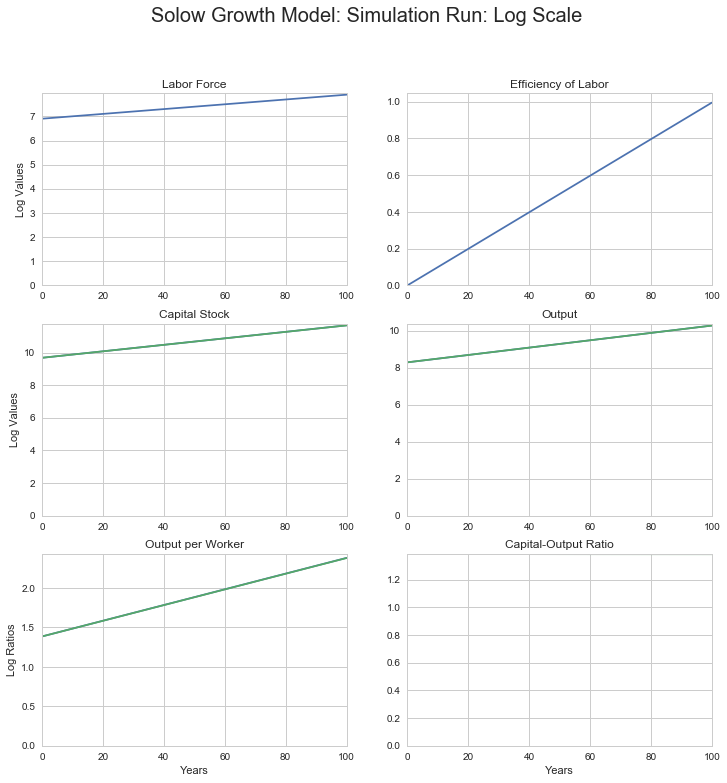

0.01 is the labor force growth rate
0.01 is the efficiency of labor growth rate
0.03 is the depreciation rate
0.2 is the savings rate
0.5 is the decreasing-returns-to-scale parameter


In [10]:
log_sgm_bgp_100yr_run(1000, 1, 16000, n=0.01, g=0.01, s=0.20, 
    alpha=0.5, delta=0.03)

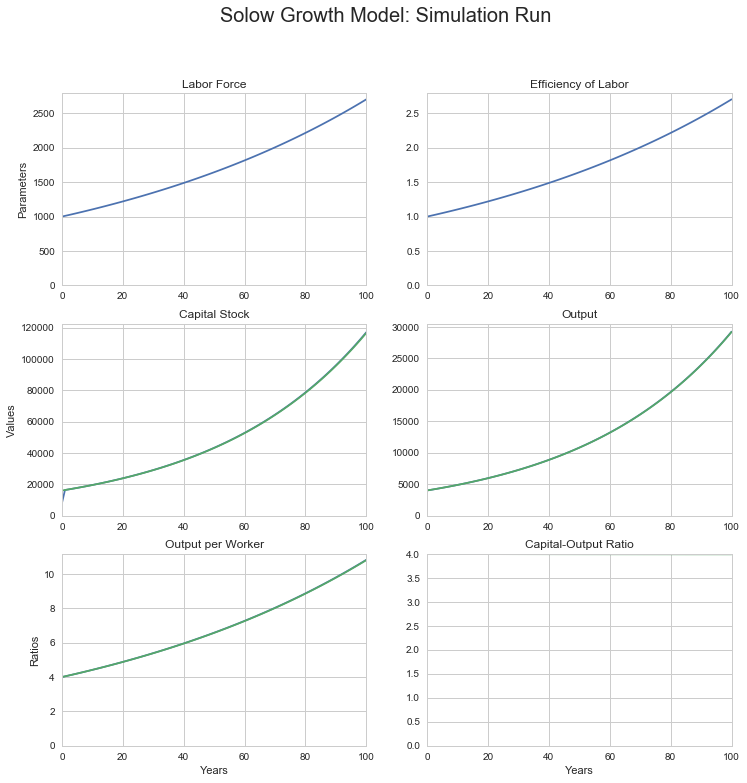

0.01 is the labor force growth rate
0.01 is the efficiency of labor growth rate
0.03 is the depreciation rate
0.2 is the savings rate
0.5 is the decreasing-returns-to-scale parameter


In [11]:
# yup...
# we can look at it in levels too:

sgm_bgp_100yr_run(1000, 1, 16000, n=0.01, g=0.01, 
    s=0.20, alpha=0.5, delta=0.03)

In [ ]:
# Now, from the s = 0.20 BGP, what happens if we suddenly jump s to 0.25
# and keep it there?
#
# This happens:

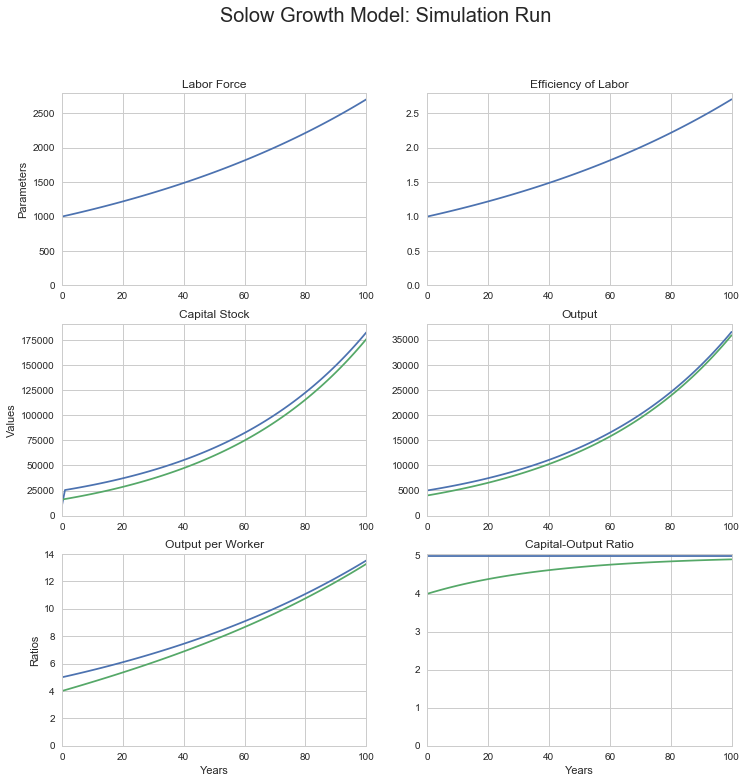

0.01 is the labor force growth rate
0.01 is the efficiency of labor growth rate
0.03 is the depreciation rate
0.25 is the savings rate
0.5 is the decreasing-returns-to-scale parameter


In [13]:
# in levels:

sgm_bgp_100yr_run(1000, 1, 16000, n=0.01, g=0.01, 
    s=0.25, alpha=0.5, delta=0.03)

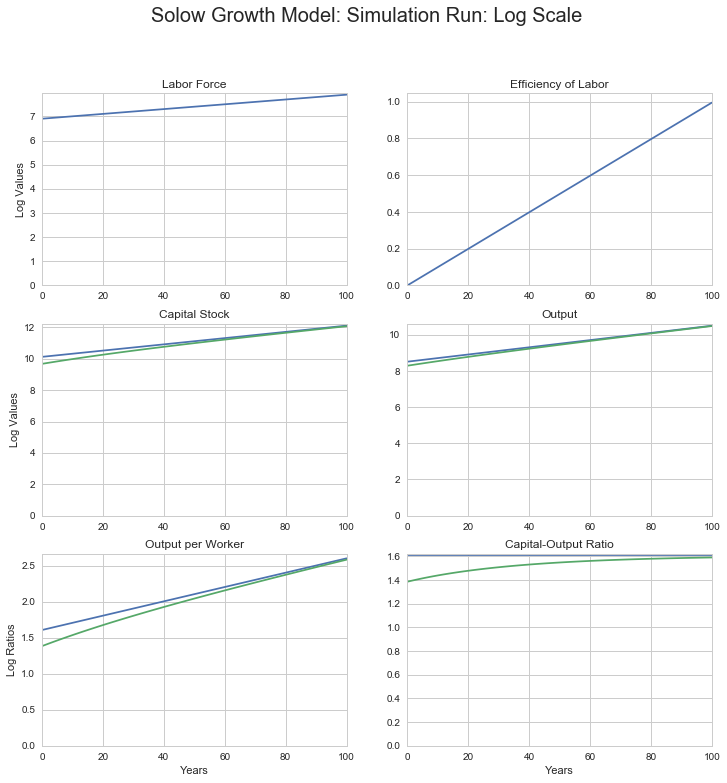

0.01 is the labor force growth rate
0.01 is the efficiency of labor growth rate
0.03 is the depreciation rate
0.25 is the savings rate
0.5 is the decreasing-returns-to-scale parameter


In [12]:
log_sgm_bgp_100yr_run(1000, 1, 16000, n=0.01, g=0.01, s=0.25, 
    alpha=0.5, delta=0.03)

In [14]:
# in the U.S. today:

n = 0.01
g = 0.015
delta = 0.03

sinitial = 0.22
alpha = 0.333
 
KoverYstarinitial = sinitial/(n + g + delta)

E = 65068

YoverLstarinitial = KoverYstarinitial**(alpha/(1-alpha)) * E

print(KoverYstarinitial, "= KoverYstarinitial")
print(YoverLstarinitial, "= YoverLstarinitial")

4.0 = KoverYstarinitial
130000.83276164823 = YoverLstarinitial


In [2]:
# a "what if"—if the tax "reform" were to boost the savings rate by
# 1.4% points...

import numpy as np

n = 0.01
g = 0.015
delta = 0.03

sfinal = 0.234
alpha = 0.333
 
KoverYstarfinal = sfinal/(n + g + delta)

E = 65068

YoverLstarfinal = KoverYstarfinal**(alpha/(1-alpha)) * E
long_run_growth_effect = np.log(YoverLstarfinal/YoverLstarinitial)

print(KoverYstarfinal, "= KoverYstarfinal")
print(YoverLstarfinal, "= YoverLstarfinal")
print(np.log(YoverLstarfinal/YoverLstarinitial), "= long-run growth effect")

4.254545454545455 = KoverYstarfinal
134067.23042795854 = YoverLstarfinal
0.154337418308 = long-run growth effect


In [3]:
# speed of convergence

speed_of_convergence = ((1 - alpha)*
    (n+g+delta))

print(speed_of_convergence, 
    "= the speed of convergence")

initial_year_growth_boost = (long_run_growth_effect 
    * speed_of_convergence)

print(initial_year_growth_boost, 
    "= initial year growth boost")

0.036685 = the speed of convergence
0.00566186819062 = initial year growth boost


----

&nbsp;

**Quoting the four Stanford economists (plus five others):**

<img style="display:block; margin-left:auto; margin-right:auto;" src="http://delong.typepad.com/.a/6a00e551f08003883401bb09ef5382970d-pi" alt="A conventional approach" title="a_conventional_approach.png" border="0" width="599" height="197" />

<https://www.wsj.com/articles/how-tax-reform-will-lift-the-economy-1511729894?mg=prod/accounts-wsj>

In [4]:
# what is (1 - alpha)(n + g + delta) here?
#
# (1 - alpha) = 2/3
# (n + g + delta) = .045

convergence_speed = 2/3 * .045

print(convergence_speed, "= convergence speed")

for i in range(11):
    print(.03 - .03 * np.exp(-convergence_speed * i), "= growth over", i, "years")

0.03 = convergence speed
0.0 = growth over 0 years
0.000886633993545 = growth over 1 years
0.00174706399247 = growth over 2 years
0.00258206444186 = growth over 3 years
0.00339238689849 = growth over 4 years
0.00417876070725 = growth over 5 years
0.00494189365766 = growth over 6 years
0.00568247262089 = growth over 7 years
0.006401164168 = growth over 8 years
0.00709861516989 = growth over 9 years
0.00777545337955 = growth over 10 years


In [5]:
##### what if we raise alpha to the "DeLong Summers" value?
#
# note: Brad DeLong and Larry Summers do **not** believe
# that the tax "reform" will raise the savings rate by 
# 1.34%: this is a "what if" exercise that, as far as I
# know, is not the analytical position of anybody:

n = 0.01
g = 0.015
delta = 0.03

sinitial = 0.22
sfinal = 0.234
alpha = 0.55

KoverYstarinitial = sinitial/(n + g + delta)
KoverYstarfinal = sfinal/(n + g + delta)

E = 22000

YoverLstarfinal = KoverYstarfinal**(alpha/(1-alpha)) * E
YoverLstarinitial = KoverYstarinitial**(alpha/(1-alpha)) * E

print(KoverYstarfinal, "= KoverYstarfinal")
print(YoverLstarfinal, "= YoverLstarfinal")
print(np.log(YoverLstarfinal/YoverLstarinitial), 
    "= long-run growth effect")
print((1 - alpha)*(n+g+delta), "= speed of convergence")
print((1 - alpha)*(n+g+delta)*
    np.log(YoverLstarfinal/YoverLstarinitial),
    "= first year growth effect")

4.254545454545455 = KoverYstarfinal
129128.17026777047 = YoverLstarfinal
0.0754032510065 = long-run growth effect
0.024749999999999998 = speed of convergence
0.00186623046241 = first year growth effect


In [6]:
# raising the alpha parameter even further...

n = 0.01
g = 0.015
delta = 0.03

sinitial = 0.22
sfinal = 0.234
alpha = 0.667

KoverYstarinitial = sinitial/(n + g + delta)
KoverYstarfinal = sfinal/(n + g + delta)

E = 7151

YoverLstarfinal = KoverYstarfinal**(alpha/(1-alpha)) * E
YoverLstarinitial = KoverYstarinitial**(alpha/(1-alpha)) * E

print(KoverYstarfinal, "= KoverYstarfinal")
print(YoverLstarfinal, "= YoverLstarfinal")
print(np.log(YoverLstarfinal/YoverLstarinitial), "= long-run growth effect")

4.254545454545455 = KoverYstarfinal
130005.45087954417 = YoverLstarfinal
0.123572403984 = long-run growth effect


<https://github.com/braddelong/LSS18E101b/blob/master/2018-02-06_Solow_Review.ipynb>

<http://datahub.berkeley.edu/user-redirect/interact?account=braddelong&repo=LSS18E101b&branch=master&path=2018-02-06_Solow_Review.ipynb>